Averaged performance of the last 3 frames.
Horizontal bar chart saved to: '/data/yeonggeonkim/anaconda/cf/4dgs/4d-gaussian-splatting/sim/report/flame_steak_py_reports_20251002_141929/latency_breakdown_horizontal_barchart.png'


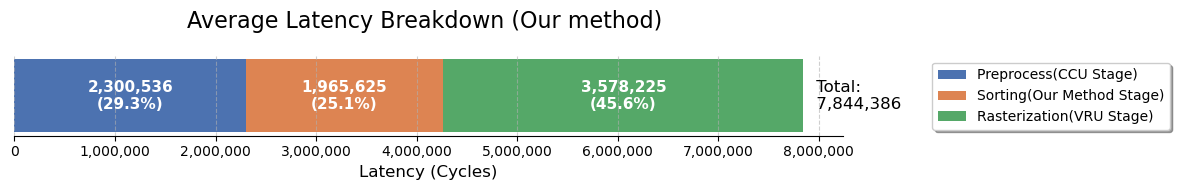

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os

file_name = '/data/yeonggeonkim/anaconda/cf/4dgs/4d-gaussian-splatting/sim/report/flame_steak_py_reports_20251002_141929/performance_details_over_frames.csv'
df = pd.read_csv(file_name)
# --- 1. Calculate Averages for Steady-State Frames ---
if len(df) > 4:
    df_steady_state = df.tail(3)
    num_frames_averaged = 3
else:
    df_steady_state = df.iloc[1:]
    num_frames_averaged = len(df_steady_state)

if num_frames_averaged == 0:
    raise ValueError("Not enough data to calculate an average (only one frame exists).")

avg_ccu = int(df_steady_state['ccu_stage_latency'].mean())
avg_sorting = int(df_steady_state['gsu_vru_sorting_latency'].mean())
avg_raster = int(df_steady_state['gsu_vru_raster_latency'].mean())

avg_latencies = [avg_ccu, avg_sorting, avg_raster]
total_avg_latency = sum(avg_latencies)

# --- 2. Prepare Data for Plotting ---
stage_labels = [
    'Preprocess(CCU Stage)',
    'Sorting(Our Method Stage)',
    'Rasterization(VRU Stage)'
]
colors = ['#4c72b0', '#dd8452', '#55a868']
bar_category = [f'Average of Last {num_frames_averaged} Frames']

# --- 3. Create the Horizontal Stacked Bar Chart ---
# 가로로 긴 형태로 figsize를 조정합니다.
fig, ax = plt.subplots(figsize=(12, 2)) 

left = 0 # 'bottom' 대신 'left'를 사용합니다.
# Loop to create each segment of the stacked bar
for i, latency in enumerate(avg_latencies):
    # ax.bar 대신 ax.barh를 사용합니다.
    ax.barh(bar_category, latency, left=left, label=stage_labels[i], color=colors[i], height=0.5)
    
    # Add text label inside the segment
    percentage = (latency / total_avg_latency) * 100
    text_label = f"{latency:,}\n({percentage:.1f}%)"
    
    # 텍스트 위치를 가로 막대의 중앙으로 조정합니다.
    text_x_position = left + latency / 2
    ax.text(text_x_position, bar_category[0], text_label, 
            ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    
    # 다음 세그먼트를 위해 left 값을 업데이트합니다.
    left += latency

# --- 4. Customize the Plot for a Modern Look ---
ax.set_title('Average Latency Breakdown (Our method) ', fontsize=16, pad=20)
ax.set_xlabel('Latency (Cycles)', fontsize=12)

# X축 눈금을 포맷팅합니다.
ax.get_xaxis().set_major_formatter(
    mticker.FuncFormatter(lambda val, loc: f"{int(val):,}")
)

# 막대 끝에 총합 레이블을 추가합니다.
ax.text(total_avg_latency * 1.01, bar_category[0], f" Total:\n {total_avg_latency:,}",
        ha='left', va='center', fontsize=12)

# 범례 위치를 조정합니다.
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), frameon=True, shadow=True)


# 불필요한 테두리(spines)를 제거하여 깔끔하게 만듭니다.
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.tick_params(axis='y', which='both', length=0) # Y축 눈금 선 제거

# 가독성을 위해 수평 그리드를 추가합니다.
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Y축 레이블을 숨겨서 더 깔끔하게 만듭니다. (카테고리가 1개이므로)
ax.set_yticklabels([])

fig.tight_layout()

# --- 5. Save and Show the Plot ---
output_directory = os.path.dirname(file_name)
output_filename = os.path.join(output_directory, 'latency_breakdown_horizontal_barchart.png')

plt.savefig(output_filename, dpi=300, bbox_inches='tight')

print(f"Averaged performance of the last {num_frames_averaged} frames.")
print(f"Horizontal bar chart saved to: '{output_filename}'")

plt.show()

Averaged performance of the last 3 frames.
Horizontal bar chart saved to: '/data/yeonggeonkim/anaconda/cf/4dgs/4d-gaussian-splatting/sim/report/flame_steak_cu_reports/latency_breakdown_horizontal_barchart.png'


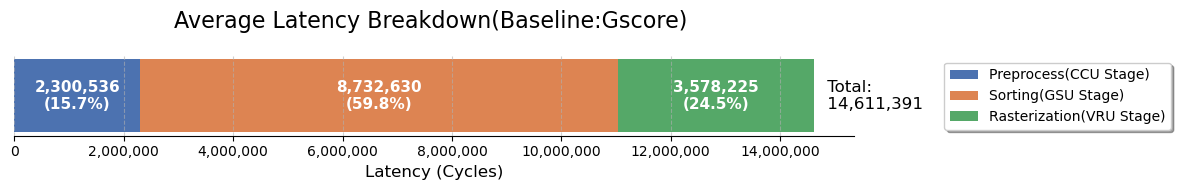

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os

file_name ='/data/yeonggeonkim/anaconda/cf/4dgs/4d-gaussian-splatting/sim/report/flame_steak_cu_reports/performance_breakdown_flame_steak_cu_20251002_155547.csv'
df = pd.read_csv(file_name)
# --- 1. Calculate Averages for Steady-State Frames ---
if len(df) > 4:
    df_steady_state = df.tail(3)
    num_frames_averaged = 3
else:
    df_steady_state = df.iloc[1:]
    num_frames_averaged = len(df_steady_state)

if num_frames_averaged == 0:
    raise ValueError("Not enough data to calculate an average (only one frame exists).")

avg_ccu = int(df_steady_state['ccu_stage_latency'].mean())
avg_sorting = int(df_steady_state['gsu_precise_sort_avg_cycles'].mean())+ int(df_steady_state['gsu_approx_sort_avg_cycles'].mean())
avg_raster = int(df_steady_state['vru_rasterize_avg_cycles'].mean())

avg_latencies = [avg_ccu, avg_sorting, avg_raster]
total_avg_latency = sum(avg_latencies)

# --- 2. Prepare Data for Plotting ---
stage_labels = [
    'Preprocess(CCU Stage)',
    'Sorting(GSU Stage)',
    'Rasterization(VRU Stage)'
]
colors = ['#4c72b0', '#dd8452', '#55a868']
bar_category = [f'Average of Last {num_frames_averaged} Frames']

# --- 3. Create the Horizontal Stacked Bar Chart ---
# 가로로 긴 형태로 figsize를 조정합니다.
fig, ax = plt.subplots(figsize=(12, 2)) 

left = 0 # 'bottom' 대신 'left'를 사용합니다.
# Loop to create each segment of the stacked bar
for i, latency in enumerate(avg_latencies):
    # ax.bar 대신 ax.barh를 사용합니다.
    ax.barh(bar_category, latency, left=left, label=stage_labels[i], color=colors[i], height=0.5)
    
    # Add text label inside the segment
    percentage = (latency / total_avg_latency) * 100
    text_label = f"{latency:,}\n({percentage:.1f}%)"
    
    # 텍스트 위치를 가로 막대의 중앙으로 조정합니다.
    text_x_position = left + latency / 2
    ax.text(text_x_position, bar_category[0], text_label, 
            ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    
    # 다음 세그먼트를 위해 left 값을 업데이트합니다.
    left += latency

# --- 4. Customize the Plot for a Modern Look ---
ax.set_title('Average Latency Breakdown(Baseline:Gscore) ', fontsize=16, pad=20)
ax.set_xlabel('Latency (Cycles)', fontsize=12)

# X축 눈금을 포맷팅합니다.
ax.get_xaxis().set_major_formatter(
    mticker.FuncFormatter(lambda val, loc: f"{int(val):,}")
)

# 막대 끝에 총합 레이블을 추가합니다.
ax.text(total_avg_latency * 1.01, bar_category[0], f" Total:\n {total_avg_latency:,}",
        ha='left', va='center', fontsize=12)

# 범례 위치를 조정합니다.
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), frameon=True, shadow=True)


# 불필요한 테두리(spines)를 제거하여 깔끔하게 만듭니다.
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.tick_params(axis='y', which='both', length=0) # Y축 눈금 선 제거

# 가독성을 위해 수평 그리드를 추가합니다.
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Y축 레이블을 숨겨서 더 깔끔하게 만듭니다. (카테고리가 1개이므로)
ax.set_yticklabels([])

fig.tight_layout()

# --- 5. Save and Show the Plot ---
output_directory = os.path.dirname(file_name)
output_filename = os.path.join(output_directory, 'latency_breakdown_horizontal_barchart.png')

plt.savefig(output_filename, dpi=300, bbox_inches='tight')

print(f"Averaged performance of the last {num_frames_averaged} frames.")
print(f"Horizontal bar chart saved to: '{output_filename}'")

plt.show()

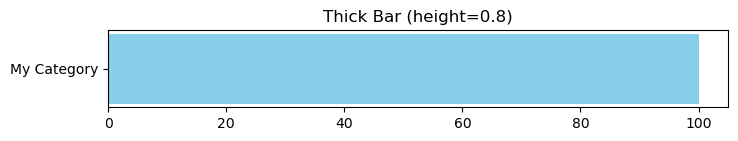

In [6]:
import matplotlib.pyplot as plt

# height=0.8로 매우 두껍게 설정
plt.figure(figsize=(8, 1))
plt.barh(['My Category'], [100], height=0.0008, color='skyblue')
plt.title('Thick Bar (height=0.8)')
plt.show()

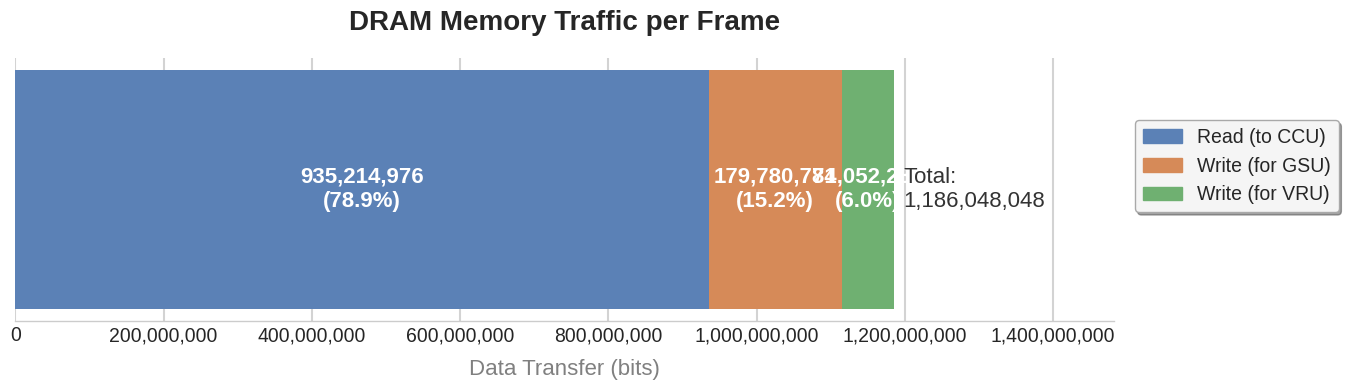

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import numpy as np

# 1. 데이터 준비 (앞서 분석한 DRAM 트래픽 데이터, bits 단위)
values = {
    'Read (to CCU)': 935214976,
    'Write (for GSU)': 179780784,
    'Write (for VRU)': 71052288
}
labels = list(values.keys())
data = list(values.values())
# Latency Breakdown 이미지의 색상 코드 사용
colors = ['#5b81b6', '#d68a58', '#6fb071'] 

total = sum(data)
percentages = [val / total * 100 for val in data]

# 누적 막대를 위한 시작 위치 계산
left_positions = np.cumsum([0] + data[:-1])

# 2. 그래프 생성
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_title("DRAM Memory Traffic per Frame", fontsize=20, fontweight='bold', pad=20)

# 3. 막대그래프 그리기
for i, (value, label, color) in enumerate(zip(data, labels, colors)):
    ax.barh(y=0, width=value, left=left_positions[i], height=0.6, color=color, align='center')
    
    # 막대 내부에 텍스트 추가
    text_x_position = left_positions[i] + value / 2
    text_to_display = f"{value:,}\n({percentages[i]:.1f}%)"
    ax.text(text_x_position, 0, text_to_display, 
            ha='center', va='center', color='white', fontsize=16, fontweight='bold')

# 4. "Total" 텍스트 추가
ax.text(total * 1.01, 0, f"Total:\n{total:,}", 
        ha='left', va='center', fontsize=16, color='#333333')

# 5. 축(Axis) 서식 설정
# x축 범위 설정 (Total과 범례를 위한 공간 확보)
ax.set_xlim(0, total * 1.25)

# x축 눈금 설정 및 쉼표(,) 서식 적용
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', labelsize=14)
ax.set_xlabel("Data Transfer (bits)", fontsize=16, labelpad=10, color='grey')

# y축은 보이지 않게 처리
ax.set_yticks([])

# 6. 불필요한 테두리(spines) 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# 7. 세로 그리드 라인 추가
ax.grid(axis='x', linestyle='-', color='lightgrey', linewidth=1.5)
ax.set_axisbelow(True) # 그리드를 막대 뒤로 보냄

# 8. 범례(Legend) 추가
legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
ax.legend(handles=legend_patches, 
          bbox_to_anchor=(1.01, 0.8), # 그래프 바깥 오른쪽에 위치
          loc='upper left', 
          fontsize=14, 
          edgecolor='darkgrey', 
          shadow=True,
          frameon=True,
          facecolor='whitesmoke')

# 9. 레이아웃 최적화 및 그래프 출력
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()